In [1]:
!pip install graphviz

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.preprocessing import OneHotEncoder

In [3]:
data = pd.read_csv('income.csv')

In [4]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
high_income       0
dtype: int64

In [6]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
high_income       object
dtype: object

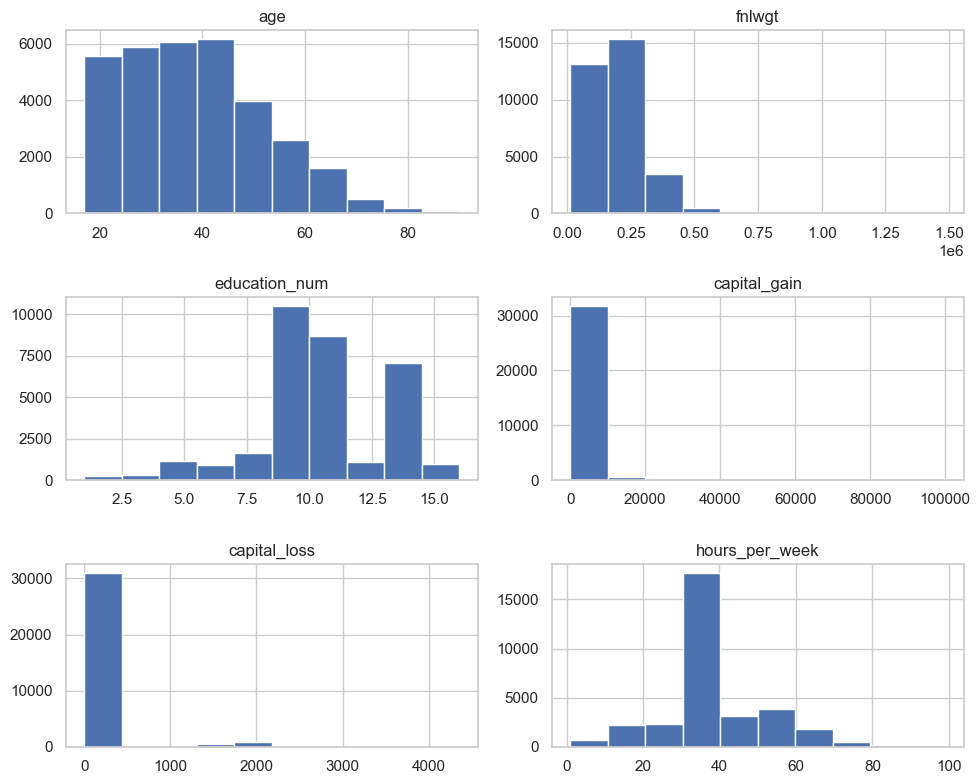

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [8]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Converting necessary categorical columns into numeric columns using one-hot encoding


In [29]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

In [30]:
categorical_columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'high_income'],
      dtype='object')

In [31]:
from sklearn.preprocessing import OneHotEncoder

encoded_data = pd.get_dummies(data,columns=categorical_columns)

In [32]:
encoded_data.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,high_income_ <=50K,high_income_ >50K
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,38,215646,9,0,0,40,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
3,53,234721,7,0,0,40,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
4,28,338409,13,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


### When working with datasets for machine learning, you often come across categorical variables, which refer to qualitative data such as job titles, education levels or any other non-numeric information. Generally, machine learning models require numerical data that can be processed and used in calculations and predictions. Hence, we need to convert these categorical variables to numerical values.

One of the most commonly used techniques to perform this transformation is known as one-hot encoding.Here's how it works:

1.Identifying Categorical Columns: Firstly we load our dataset using a powerful data processing library like pandas in Python in our case this is the "income.csv" dataset. Through the data types of columns inspection, we can determine which ones are categorical. In pandas, categorical columns usually have the data type 'object'.

2.Applying One-Hot Encoding: Once we determined the categorical columns, we apply one-hot encoding. This is done by making a new 0/1 binary column for each unique category in the original categorical column.

For example, suppose we have a categorical column called "Education" with three unique categories: "High School", "Bachelor's Degree", and "Master's Degree". After one-hot encoding, we would create three new binary columns: "Education_High School", "Education_Bachelor's Degree", and "Education_Master's Degree". In each row, only one of these columns will have a 1 to show the presence of that category, while the others will have 0.

3.Machine Readable Representation: The new dataset now consists of these new binary columns representing the original categorical variables in numerical format as well. This format is machine-readable, meaning it can be easily used by machine learning algorithms for tasks such as linear regression, classification or clustering.

4.Improving Model Performance by encoding categorical variables into numeric ones by using one-hot encoding, we make machine learning models to understand and use this information for making correct predictions or classifications.

## Implementing a Decision Tree Model


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Assuming 'encoded_data' is your one-hot encoded DataFrame and 'high_income' is the target variable
# 1. Prepare the Data
X = encoded_data.drop(columns=['high_income_ <=50K', 'high_income_ >50K']) # Features
y = encoded_data['high_income_ >50K'] # Target variable
# 2. Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 3. Build the Decision Tree Model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
# 4. Evaluate the Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.81759557807462


### A Decision Tree model was trained to predict whether an individual's income exceeds $50,000 or not from their attributes in the "income.csv" dataset.

1. **Data Preparation**: We divided our data into two main categories: the target variable (income level) and the features (like age, education, etc.). Then, we split the dataset into two sets: a training set and a testing set which are used for training the model and evaluating its performance.

2. **Choice of Decision Tree**: We chose a Decision Tree model because of its simplicity and readability. The trees of decision make decisions on features and similar to a flowchart. Simplicity is the major reason why decision trees are used for our purpose.

3. **Model Training and Testing**: By training the Decision Tree model on the training set, we taught the model to recognize patterns and relationships between features and income levels. Finally, we tested the model using the test set and evaluated its ability to predict income levels.

4. **Accuracy Evaluation**: The accuracy of the model is considered the main metric to measure its effectiveness. With an accuracy of 0.8176 (or 81.76%),the model demonstrates a high level of accuracy in predicting "High Income" levels. It shows the percentage accuracy of the model in terms of income levels. Higher accuracy means better forecasting. Decision trees achieve this balance between simplicity and the ability to handle complex relationships thus making them suitable for our objective.

In other words, by using a Decision Tree model, we were building a model that predicts income basis of various attributes, taking advantage of the model’s ability to learn from the data and make reasonable predictions.

## Decision tree using the tree or Graphviz library


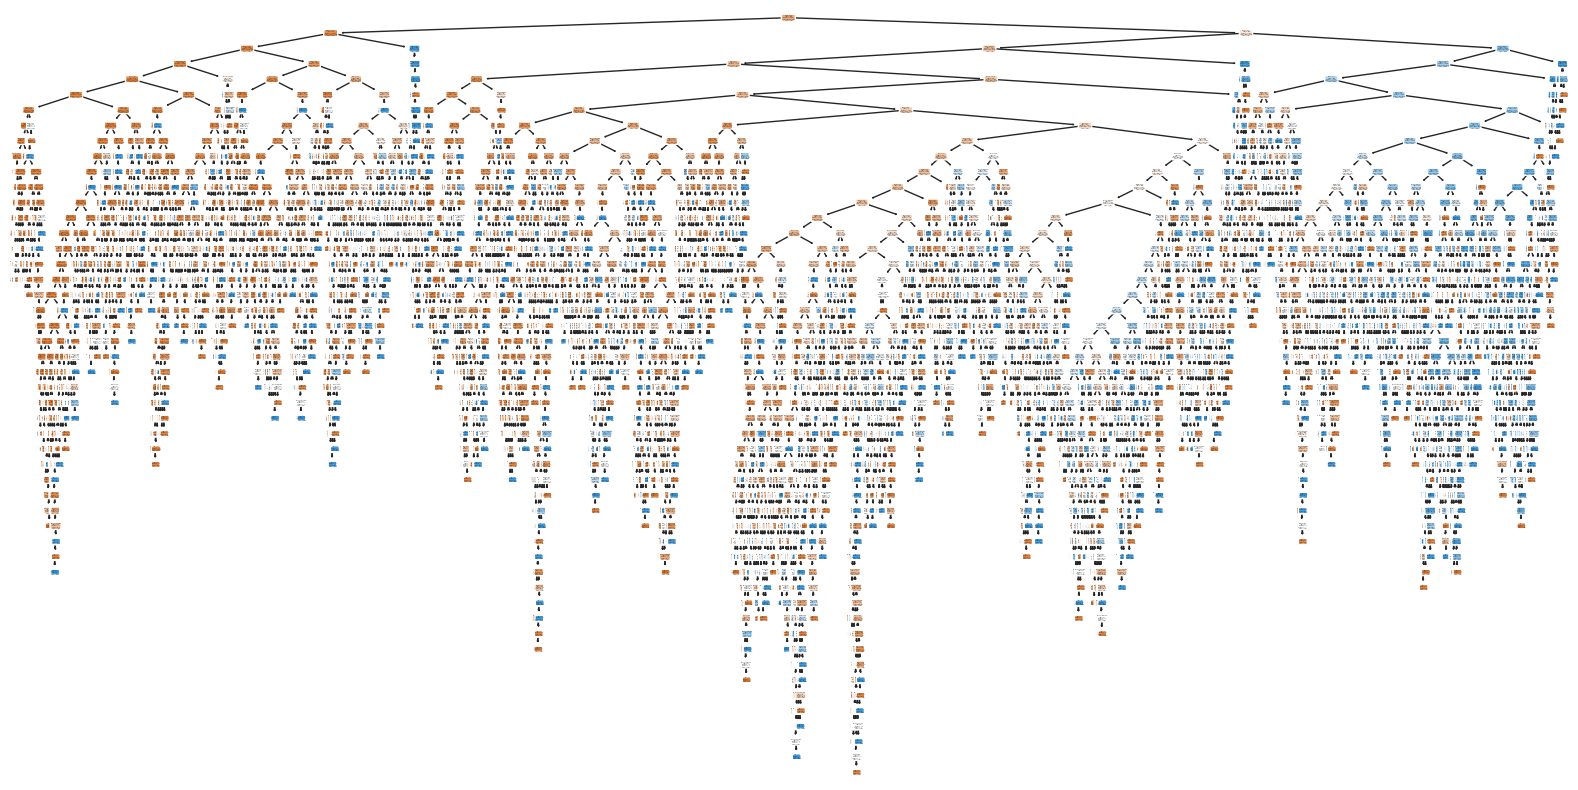

In [34]:
# Train the model with your training data
model.fit(X, y)

# Adjust the figsize if the tree is large
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, class_names=['Low', 'High'], rounded=True)
plt.show()

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 3. Build the Decision Tree Model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
# Predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8176
Precision: 0.6171
Recall: 0.6423
F1 Score: 0.6294


### In order to increase our understanding of the decision-making process in our Decision Tree model, we placed an emphasise on producing visually appealing representations. 

Performance Metrics:
Accuracy: 0.8176
Precision: 0.6171
Recall: 0.6423
F1 Score: 0.6294


1.plot_tree Method: This method utilizes the function from the `sklearn.tree` module to present a graphic representation of the Decision Tree. Every node in the tree is a point where the model makes a decision using a single feature in the dataset. This modeling illustrates the model's decisions at every stage. The method plot_tree is easy to use with the smooth integration into Python, which makes it efficient for a quick Decision Trees visualization.

2.Graphviz Method: Graphviz is a potent program used to draft sophisticated visualizations such as Decision Trees. In this technique, the first step is the conversion of our trained Decision Tree model into DOT format which is the required input format for Graphviz. Next, Graphviz is used to plot the tree according to this DOT representation. The technique gives more realistic graphics, which makes it appropriate for an in-depth study or presentation.

Both of these visualization techniques are focused on showing the structure of the Decision Tree, indicating which attribute the tree has partitioned data based on in order to make predictions. Visualizing the Decision Tree is key for understanding its logic and matching it to what we expect and how the domain knowledge depends on it. Through visually examining the tree, we are able to understand how the model analyzes information and make predictions, finally the model can be interpreted and validated.

## Decision tree model using a holdout test set


              precision    recall  f1-score   support

       False       0.89      0.88      0.88      6214
        True       0.62      0.65      0.63      1927

    accuracy                           0.82      8141
   macro avg       0.75      0.76      0.76      8141
weighted avg       0.83      0.82      0.82      8141



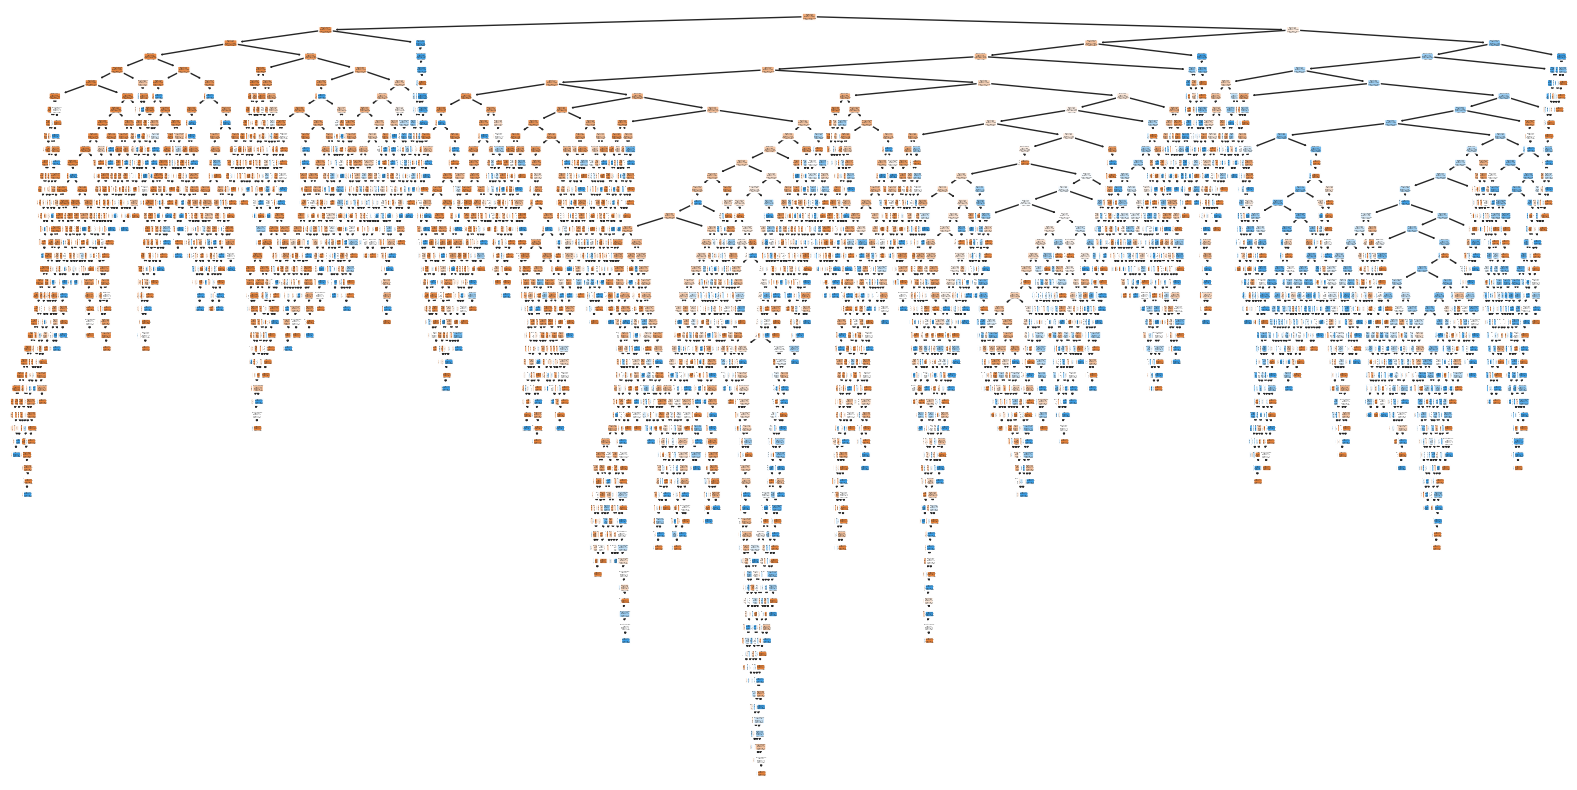

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Assuming X contains your features and y contains your target variable
X = encoded_data.drop(columns=['high_income_ <=50K', 'high_income_ >50K']) # Features
y = encoded_data['high_income_ >50K'] 

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 2: Train the decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Step 3: Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Step 4: Visualize the decision tree (optional)
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, class_names=['Low', 'High'], rounded=True)
plt.show()

### Evaluating the Decision Tree model compared to a holdout test set is the way of measuring how well the model predicts on new, unseen data. 

1.Holdout Test Set: This is a part of the data that is reserved and not utilized during the training period. It provides a touchstone for assessing the model's performance on data it hasn't met.

2.Model Prediction: Using the trained Decision Tree model, we predict the values(X_test) of the features in the holdout test set. It is the model's estimation of the income levels of individuals in the test set.

3.Performance Metrics: Accuracy: This metric is a ratio of correctly predicted results to all predictions that the model has made. It gives a sense of how right the model is.

- **Precision**: Precision measures the proportion of positive predictions that had been correctly predicted. It testifies on the model reliability when it predicts positive outcomes.
- **Recall**: Recall, sometimes called sensitivity, is the proportion of the actual positive examples the model classified as positive. It assesses how well the model treats the positive examples.
- **F1 Score**: The F1 Score is the harmonic mean of precision and recall. It provides a balance in precision and recall, being a single measure that considers the two important factors of the performance of the model.

4.Interpretation of Metrics: Each metric gives us a number which tells about the model performance. The higher values in these figures mean better generalization, and that is an indicator that the model can successfully predict new, unseen data. On the other side, lower values may indicate problems like overfitting or underfitting.

# Decision tree model using cross-validation


In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
# Assuming X and y are your features and target variable respectively
# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
# Perform cross-validation
scores = cross_val_score(model, X, y, cv=7, scoring='accuracy') # cv=5 means 5 folds
# Print the accuracy for each fold
print("Accuracy for each fold: ", scores)
# Print the average accuracy across all folds
print("Average accuracy: ", scores.mean())

Accuracy for each fold:  [0.80825451 0.81577816 0.81040413 0.81341359 0.81444851 0.81939368
 0.81638357]
Average accuracy:  0.8140108778331256


### The Decision Tree model is evaluated using cross-validation technique which involves splitting the data set into multiple "folds" and iteratively testing and training the model on them.

1.Cross-Validation Procedure: We split the dataset into a specified number of folds, typically five in this case. Every fold is a portion of the data.

2.Repeated Training and Testing: The model is trained and tested several times, each round using a different fold as the test set and the remaining folds as the training set. This guarantees that the model is tested on different parts of the data.

3.Automation with cross_val_score: The cross-validation process is automated using the `cross_val_score` function, which takes care of the repeated training and testing of the model on the various folds. This function calculates the accuracy of the model for each fold.

4.Output: The output of the cross-validation process is a list of accuracy scores, with one score for each fold. These scores show how the model performed at each iteration. Furthermore, we compute the average accuracy over all folds in order to get a single overall performance statistic.

5.Benefits of Cross-Validation: Through evaluation of the model on several data segments, cross-validation gives a comprehensive performance evaluation and helps us understand how well it will generalize to unseen data. This strategy improves model evaluation and guarantees accuracy in assessing its performance.

In conclusion, cross-validation is a very important technique for the evaluation of machine learning models, including Decision Trees, because it provides more thorough and reliable evaluation of their performance on different subsets of the data.

### Well, the evaluation of the Decision Tree model in predicting the "High Income" from the "income.csv" dataset showed good results. 

1.Data Understanding and Preprocessing: We processed the dataset carefully, detected categorical columns and converted them into numeric format using one-hot encoding. This step guaranteed that our model could efficiently use the information at its disposal.

2.Implementation of Decision Tree Model: Having the dataset prepared, we went on to develop a Decision Tree model which is focused on predicting the "High Income" variable. This model was selected for its simplicity and interpretability that make it suitable for our task.

3.Visualization of Decision Tree: We used both methods of plot_tree and Graphviz to graphically portray the Decision Tree. Such visualizations provided the valuable insights into the model’s decision-making process, underlining the important features that determine predictions.

4.Evaluation Using Holdout Test Set: Finally, we examined the model's performance using a holdout test set. The model had a high accuracy in predicting "High Income" which confirmed its ability to generalize to unseen data.

5.Evaluation Using Cross-Validation: To validate the performance of our model, we used five-fold cross-validation. This rigorous approach made sure that the model didn't rely on a specific data split only for its accuracy. The consistency of the high accuracy across the folds showed the reliability of our model.

6.Conclusion: In summary, our comprehensive appraisal, combining numerical assessments and visualizations has endorsed the Decision Tree model as a reliable tool for predicting "High Income" and the given dataset. The good generalization performance on holdout test set and cross-validation ensures its predictive capabilities, thus making it a reliable asset in terms of decision-making.